In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [9]:
df = pd.read_csv("candlestick_chart_2.csv")

In [11]:
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,LastPrice_imputed,Year
0,0,HDFCBANK,EQ,15-06,1151.85,1155.00,1170.90,1153.20,1168.00,1169.55,1162.38,761456,8.851028e+08,18995,473129,62.13,False,2016
1,1,HDFCBANK,EQ,16-06,1169.55,1166.55,1168.85,1155.35,1160.75,1162.15,1162.80,1181942,1.374367e+09,29029,735044,62.19,False,2016
2,2,HDFCBANK,EQ,17-06,1162.15,1167.00,1178.00,1165.55,1171.10,1170.00,1172.49,940413,1.102624e+09,16726,560769,59.63,False,2016
3,3,HDFCBANK,EQ,20-06,1170.00,1159.00,1179.25,1158.80,1170.00,1172.05,1172.16,685691,8.037416e+08,21802,357602,52.15,False,2016
4,4,HDFCBANK,EQ,21-06,1172.05,1175.00,1175.45,1161.20,1164.30,1166.65,1166.05,667742,7.786190e+08,12721,356707,53.42,False,2016


In [25]:
df["Fulldate"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Date"],
    format = "%Y-%d-%m"
)

In [27]:
df[["Year", "Date", "Fulldate"]].head()

,Year,Date,Fulldate
0,2016,15-06,2016-06-15
1,2016,16-06,2016-06-16
2,2016,17-06,2016-06-17
3,2016,20-06,2016-06-20
4,2016,21-06,2016-06-21


In [31]:
df = df.drop(columns=["Date","Year"])

In [33]:
df = df.rename(columns={"Fulldate": "Date"})

In [35]:
df.head()

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,LastPrice_imputed,Date
0,0,HDFCBANK,EQ,1151.85,1155.00,1170.90,1153.20,1168.00,1169.55,1162.38,761456,8.851028e+08,18995,473129,62.13,False,2016-06-15
1,1,HDFCBANK,EQ,1169.55,1166.55,1168.85,1155.35,1160.75,1162.15,1162.80,1181942,1.374367e+09,29029,735044,62.19,False,2016-06-16
2,2,HDFCBANK,EQ,1162.15,1167.00,1178.00,1165.55,1171.10,1170.00,1172.49,940413,1.102624e+09,16726,560769,59.63,False,2016-06-17
3,3,HDFCBANK,EQ,1170.00,1159.00,1179.25,1158.80,1170.00,1172.05,1172.16,685691,8.037416e+08,21802,357602,52.15,False,2016-06-20
4,4,HDFCBANK,EQ,1172.05,1175.00,1175.45,1161.20,1164.30,1166.65,1166.05,667742,7.786190e+08,12721,356707,53.42,False,2016-06-21


In [37]:
df= df.sort_values("Date")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 659
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              660 non-null    int64         
 1   Symbol                  660 non-null    object        
 2   Series                  660 non-null    object        
 3   Prev Close              660 non-null    float64       
 4   Open Price              660 non-null    float64       
 5   High Price              660 non-null    float64       
 6   Low Price               660 non-null    float64       
 7   Last Price              660 non-null    float64       
 8   Close Price             660 non-null    float64       
 9   Average Price           660 non-null    float64       
 10  Total Traded Quantity   660 non-null    int64         
 11  Turnover                660 non-null    float64       
 12  No. of Trades           660 non-null    int64         


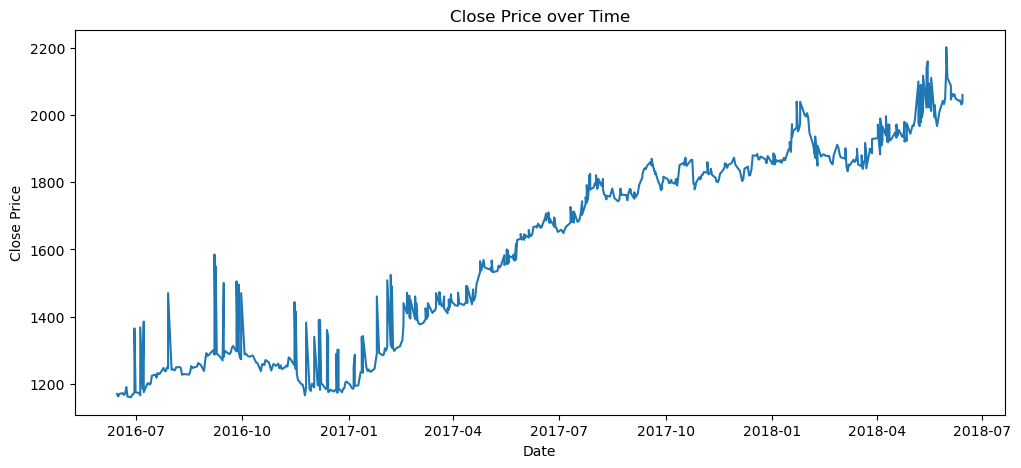

In [41]:
#Close Price über Zeit
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close Price'])
plt.title("Close Price over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


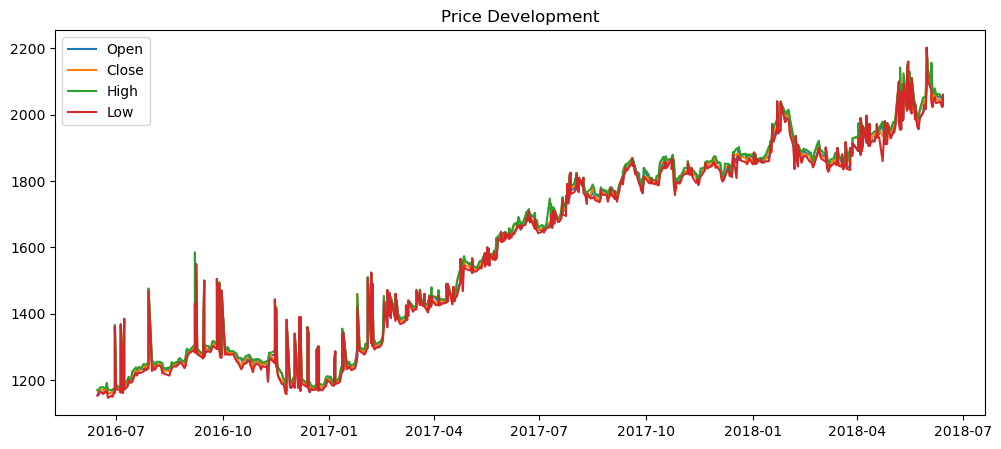

In [43]:
#Vergleich mehrerer Preise
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Open Price'], label='Open')
plt.plot(df['Date'], df['Close Price'], label='Close')
plt.plot(df['Date'], df['High Price'], label='High')
plt.plot(df['Date'], df['Low Price'], label='Low')
plt.legend()
plt.title("Price Development")
plt.show()


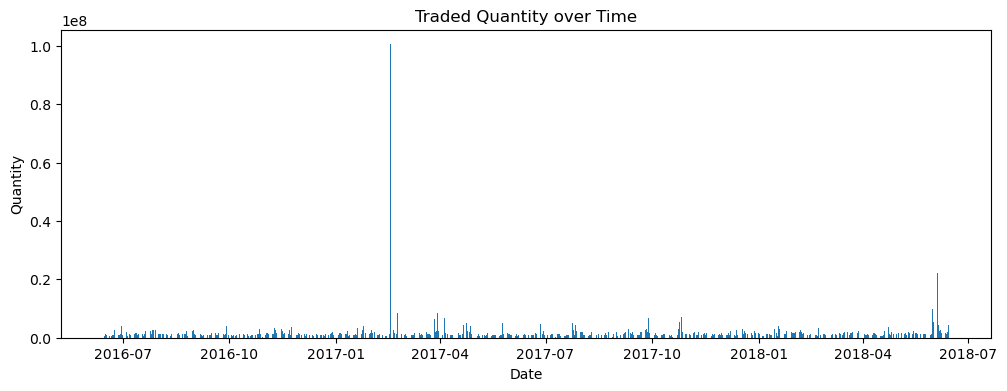

In [45]:
#Volumen analysieren
plt.figure(figsize=(12,4))
plt.bar(df['Date'], df['Total Traded Quantity'])
plt.title("Traded Quantity over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()


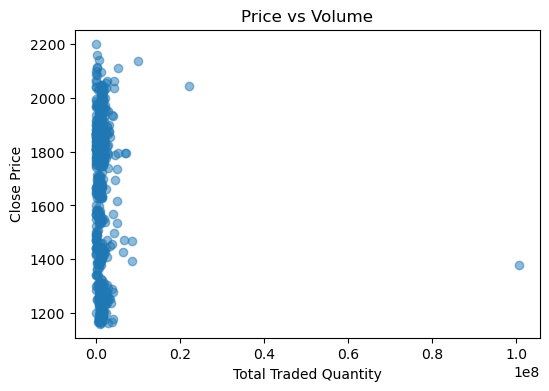

In [47]:
#Zusammenhang prüfen
plt.figure(figsize=(6,4))
plt.scatter(df['Total Traded Quantity'], df['Close Price'], alpha=0.5)
plt.xlabel("Total Traded Quantity")
plt.ylabel("Close Price")
plt.title("Price vs Volume")
plt.show()


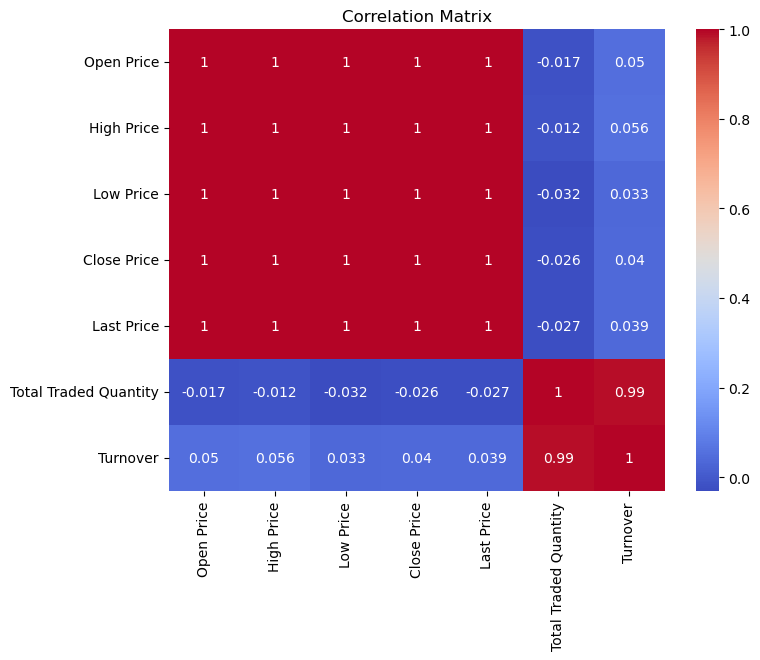

In [49]:
#Korrelationen (quantitativ)
corr = df[['Open Price','High Price','Low Price','Close Price',
           'Last Price','Total Traded Quantity','Turnover']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
